### <font color='blue'> Machine Learning - Adult Income Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

C:\Users\ganes\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
adult_df = adult.data.original

### <font color='blue'>Exploratory Data Analysis

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.shape

(48842, 15)

In [5]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
adult_df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [8]:
adult_df.sample(frac=0.2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9829,50,Self-emp-inc,204447,Some-college,10,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
33065,39,Self-emp-not-inc,37019,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K.
16315,34,Private,112820,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,2463,0,40,United-States,<=50K
40103,35,Private,214378,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K.
14776,34,Private,184942,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40726,65,Private,29276,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,2538,0,50,United-States,<=50K.
39994,24,Self-emp-not-inc,194102,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K.
40265,34,Private,71865,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Other,Female,0,0,40,Portugal,<=50K.
28161,52,Private,159755,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,40,United-States,>50K


In [9]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [10]:
adult_df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
numerical_cols = list(adult_df.select_dtypes(include='number'))
categorical_cols = list(adult_df.select_dtypes(include='object'))

In [13]:
for col in numerical_cols:
    print('Range of values in {} \t {} to {}'.format(col,adult_df[col].min(),adult_df[col].max()))
    
for col in categorical_cols:
    print(col.upper())
    print(adult_df[col].unique())

Range of values in age 	 17 to 90
Range of values in fnlwgt 	 12285 to 1490400
Range of values in education-num 	 1 to 16
Range of values in capital-gain 	 0 to 99999
Range of values in capital-loss 	 0 to 4356
Range of values in hours-per-week 	 1 to 99
WORKCLASS
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
EDUCATION
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
MARITAL-STATUS
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
OCCUPATION
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
RELATIONSHIP
['Not-in-family' 'Husband' 'Wif

### <font color='blue'> Univariate Analysis </font>
#### <font color='blue'>Univariate analysis is the simplest form of analyzing data, where the focus is on one variable at a time. The goal is to describe, summarize, and find patterns in a single variable without considering relationships with other variables.

#### Types of univariate Analysis
<ol> <li>Categorical (Qualitative) Variables </li>
Analysis techniques:<ul> <li>Frequency tables

<li>Bar charts

<li>Pie charts

<li>Mode
</ul>
  
<li>Numerical (Quantitative) Variables</li>
Analysis techniques:
<ul> 
<li>Measures of central tendency: Mean, Median, Mode

<li>Measures of dispersion: Range, Variance, Standard Deviation, Interquartile Range (IQR)

<li>Distribution: Histograms, Box plots, Density plots

<li>Outlier detection </ul>

<li> Goals of Univariate Analysis
<ul><li>Understand the distribution of the data

<li>Identify central values and spread

<li>Detect outliers

<li>Prepare data for further analysis (like bivariate or multivariate analysis)



###### <font color='blue'> Age Column

In [14]:
adult_df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [15]:
adult_df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

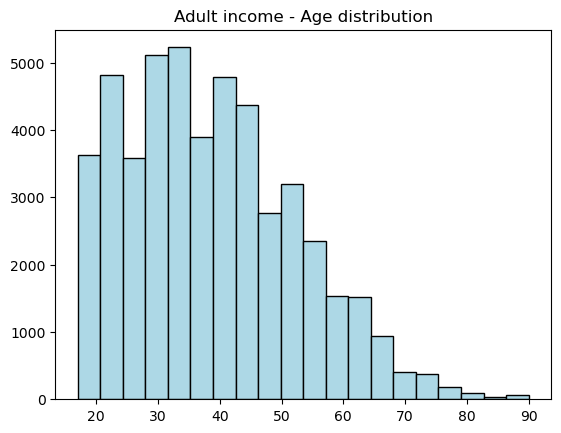

In [16]:
plt.hist(adult_df['age'], bins=20,color='lightblue',edgecolor='black')
plt.title('Adult income - Age distribution')
plt.show()

In [17]:
(adult_df['age']>80).value_counts()

age
False    48694
True       148
Name: count, dtype: int64

In [18]:
(adult_df[adult_df['age']>80])['age'].value_counts()

age
90    55
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

#### <font color='green'> The age is distributed from 17 to 90, with high frequency from 20 to 50 years, with few values in 80 to 90 years. Though the frequency is less in this age group, there are 148 participants who fall under this category. So there is least of chance of outliers being detected in this column.

###### <font color='blue'> Fnlwgt Column

In [19]:
adult_df['fnlwgt'].value_counts()

fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64

In [20]:
adult_df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

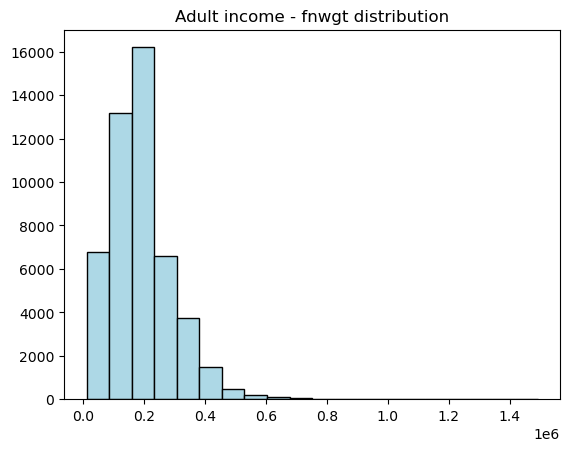

In [21]:
plt.hist(adult_df['fnlwgt'], bins=20,color='lightblue',edgecolor='black')
plt.title('Adult income - fnwgt distribution')
plt.show()

#### <font color='green'> The fnlwgt is distributed from 12285 to 14904 and is right skewed

###### <font color='blue'> Marital-stauts Column

In [22]:
adult_df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

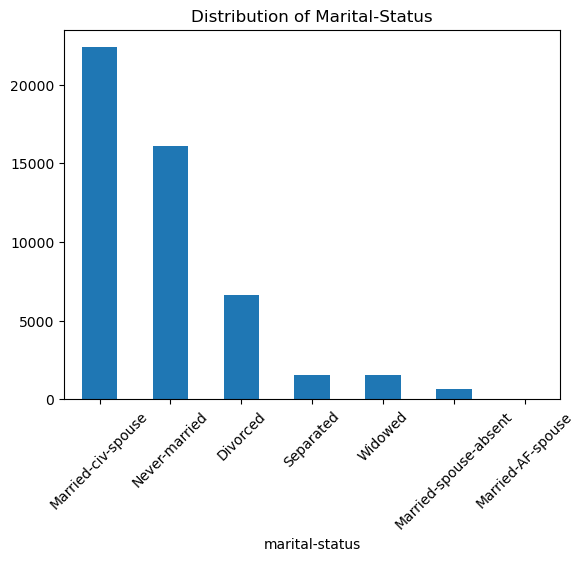

In [23]:
adult_df['marital-status'].value_counts().plot(kind='bar')
plt.title('Distribution of Marital-Status')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The column 'marital=status' has 7 independent categories, with 'Married-civ-spouse' is most common. No cleaning or grouping required for this column.

###### <font color='blue'> Relationship Column

In [24]:
adult_df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

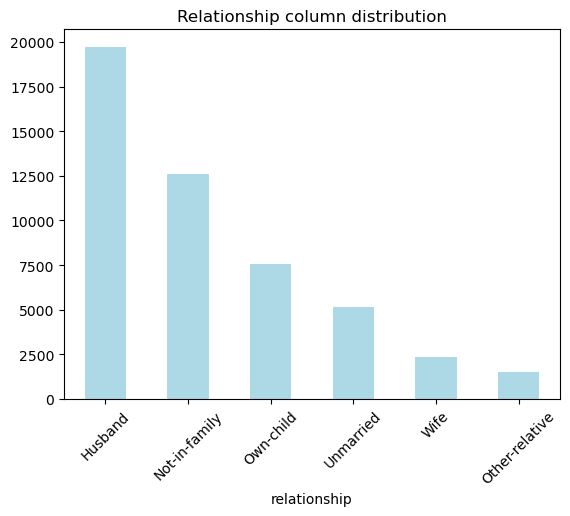

In [25]:
adult_df['relationship'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Relationship column distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The column 'relationship' has 6 independent categories, with 'Husband' being the most common. No cleaning or grouping required for this column.

###### <font color='blue'> Race Column

In [26]:
adult_df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

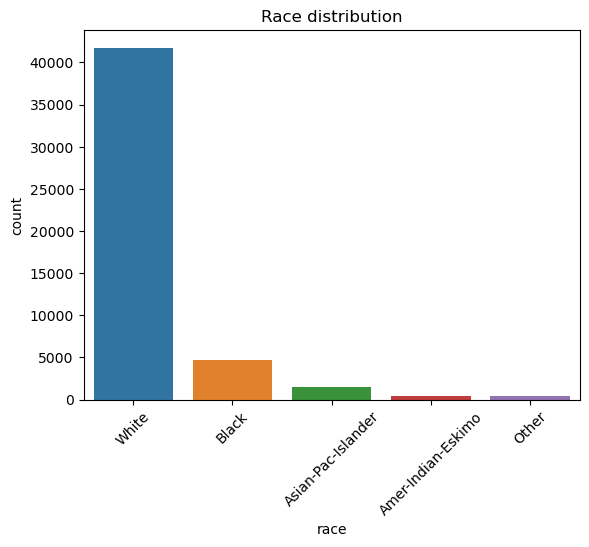

In [27]:
sns.countplot(data=adult_df, x='race', order=adult_df['race'].value_counts().index)
plt.title('Race distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The column 'race' has 5 independent categories, with 'White' being the most common. No cleaning or grouping required for this column.

###### <font color='blue'> Sex Column

In [28]:
adult_df['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

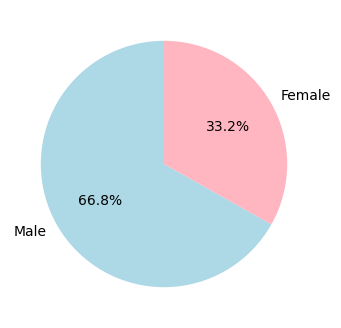

In [29]:
cnt = adult_df['sex'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=90)
plt.show()

#### <font color='green'> Male population is twice as the female population in our dataset.

###### <font color='blue'> Capital-Gain Column

In [30]:
adult_df['capital-gain'].value_counts()

capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [31]:
adult_df['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

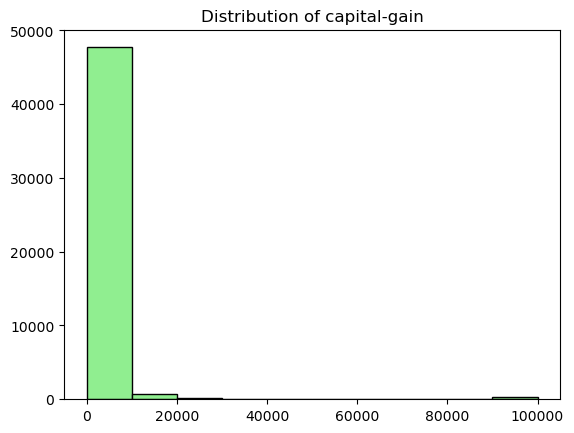

In [32]:
plt.hist(adult_df['capital-gain'],bins=10,edgecolor='black',color='lightgreen')
plt.title('Distribution of capital-gain')
plt.show()

In [33]:
cap_gain = adult_df[adult_df['capital-gain'] > 20000]
cap_gain.shape

(381, 15)

In [34]:
cap_gain['income'].value_counts()

income
>50K      245
>50K.     126
<=50K       8
<=50K.      2
Name: count, dtype: int64

In [35]:
cap_gain = adult_df[adult_df['capital-gain'] > 25000]
cap_gain.shape

(331, 15)

In [36]:
cap_gain['income'].value_counts()

income
>50K      208
>50K.     114
<=50K       7
<=50K.      2
Name: count, dtype: int64

In [37]:
cap_gain['capital-gain'].value_counts()

capital-gain
99999    244
27828     58
25236     14
34095      6
25124      6
41310      3
Name: count, dtype: int64

In [38]:
cap_gain = adult_df[adult_df['capital-gain'] > 50000]
cap_gain.shape

(244, 15)

In [39]:
cap_gain['capital-gain'].value_counts()

capital-gain
99999    244
Name: count, dtype: int64

In [40]:
cap_gain['income'].value_counts()

income
>50K     159
>50K.     85
Name: count, dtype: int64

In [41]:
cap_gain['education'].value_counts()

education
Prof-school     68
Bachelors       63
HS-grad         34
Masters         30
Doctorate       23
Some-college    18
Assoc-voc        3
10th             2
Assoc-acdm       1
9th              1
5th-6th          1
Name: count, dtype: int64

In [42]:
cap_gain.sample(frac=0.3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
30913,38,Private,185848,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,70,United-States,>50K
38334,42,Private,34218,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,99999,0,80,United-States,>50K.
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
18408,47,Self-emp-inc,181130,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,50,United-States,>50K
33553,59,Self-emp-inc,77816,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48582,61,Self-emp-not-inc,151369,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,>50K.
42457,46,Private,117849,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K.
28264,51,Self-emp-not-inc,120781,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Other,Male,99999,0,70,India,>50K
4625,47,Private,345493,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,55,Taiwan,>50K


#### <font color='green'> The 'Capital-gain' column is completely right skewed, with more than 90% of the values is 0 and less than 1% of the rows have the 'capital-gain' of > 20000. 244 rows have the capital-gain of 99999 which may or may not be a possible outlier. But these rows have the correct corresponding value (>50K) in the 'income' column. The values in other columns are also distributed, means the same values are not repeated.

###### <font color='blue'> Capital-Loss Column

In [43]:
adult_df['capital-loss'].value_counts()

capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

In [44]:
adult_df['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

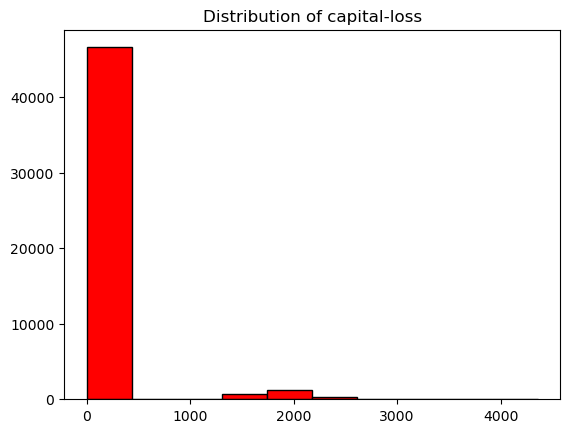

In [45]:
plt.hist(adult_df['capital-loss'],bins=10,edgecolor='black',color='red')
plt.title('Distribution of capital-loss')
plt.show()

In [46]:
cap_loss = adult_df[adult_df['capital-loss'] > 2000]
cap_loss.shape

(491, 15)

In [47]:
cap_loss['capital-loss'].unique()

array([2042, 2179, 2206, 2339, 2415, 2051, 2377, 2352, 2392, 2001, 2002,
       2258, 2547, 2174, 2205, 2444, 2238, 3004, 2231, 2824, 2559, 2057,
       2149, 2129, 2603, 2282, 4356, 2246, 2489, 3770, 3683, 2267, 2080,
       2457, 3900, 2201, 2467, 2163, 2754, 2472, 3175, 2465], dtype=int64)

In [48]:
cap_loss['income'].value_counts()

income
<=50K     183
>50K      142
<=50K.    102
>50K.      64
Name: count, dtype: int64

#### <font color='green'> The 'Capital-loss' column is right skewed, with more than 95% of the values being 0. The other values are distributed between 1500 and 4500.

###### <font color='blue'> Hours-per-week Column

In [49]:
adult_df['hours-per-week'].value_counts()

hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
82        1
87        1
69        1
Name: count, Length: 96, dtype: int64

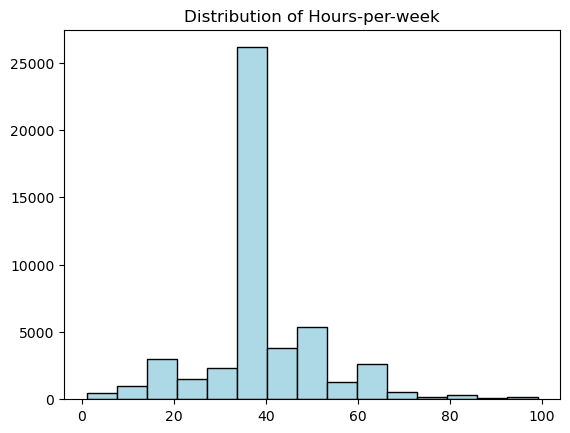

In [50]:
plt.hist(adult_df['hours-per-week'],bins=15,edgecolor='black',color='lightblue')
plt.title('Distribution of Hours-per-week')
plt.show()

#### <font color='green'> In the 'hours-per-week' column, more than 50% of the values is 40 which is nominal for most of the jobs. The values > 70 may need further analysis.

###### <font color='blue'> Workclass Column

In [51]:
adult_df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

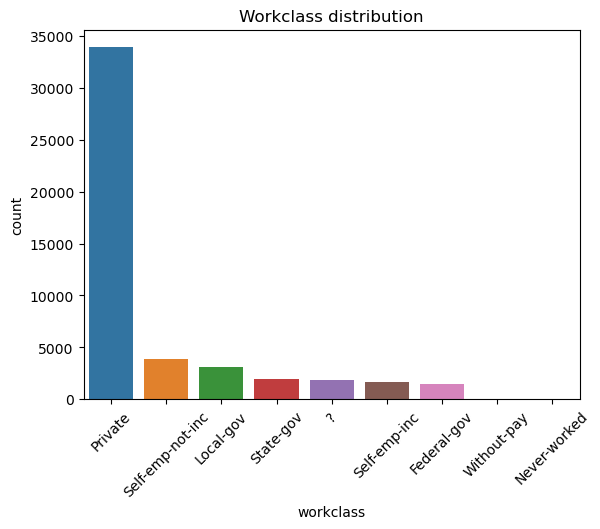

In [52]:
sns.countplot(data=adult_df, x='workclass', order=adult_df['workclass'].value_counts().index)
plt.title('Workclass distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The workclass categories are widely distributed with 2/3rd of the data being 'Private' and the categories 'Without-pay' and 'Never-worked' having least values. There are null values in this column, and also the inconsistent value '?'.

###### <font color='blue'> Education Column

In [53]:
adult_df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

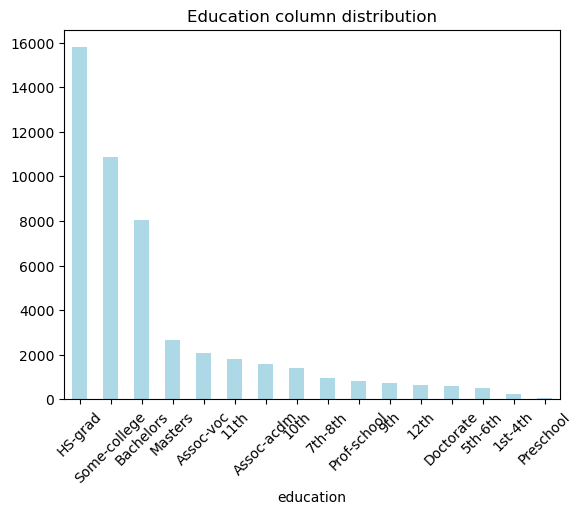

In [54]:
adult_df['education'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Education column distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The education categories are widely distributed with 1/3rd of the data being 'HS-grad' and 'Preschool' category is negligible.

###### <font color='blue'> Education-num Column

In [55]:
adult_df['education-num'].value_counts()

education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

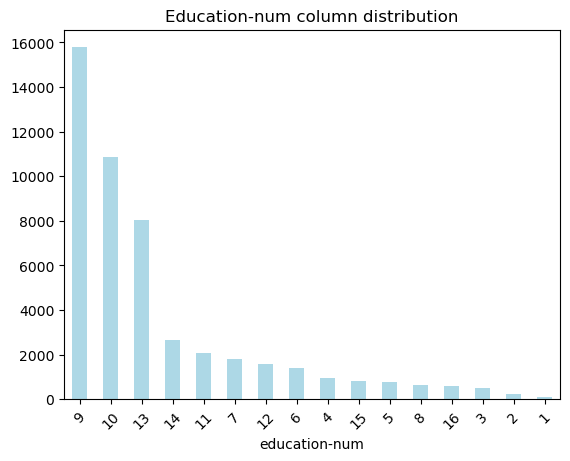

In [56]:
adult_df['education-num'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Education-num column distribution')
plt.xticks(rotation=45)
plt.show()

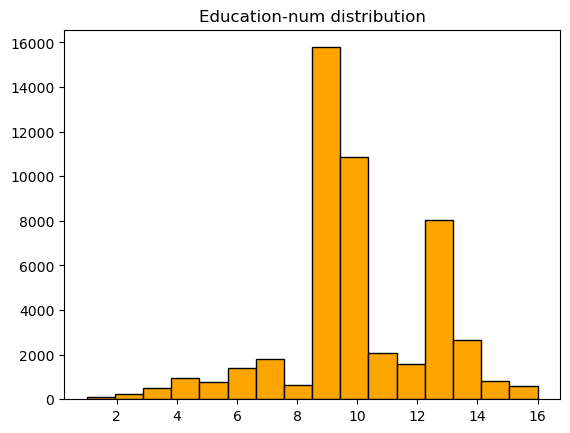

In [57]:
plt.hist(adult_df['education-num'],bins=16,color='orange',edgecolor='black')
plt.title('Education-num distribution')
plt.show()

#### <font color='green'> The education-num column is duplicate of the education column with categories being replaced with numbers.

###### <font color='blue'> Occupation Column

In [58]:
adult_df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

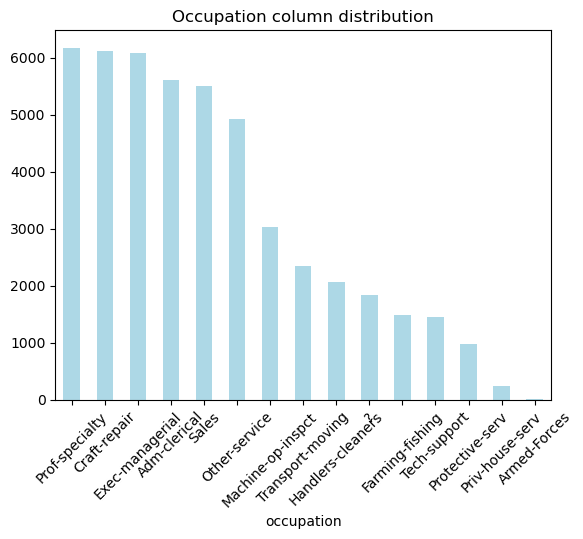

In [59]:
adult_df['occupation'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Occupation column distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The occupation categories are widely distributed and balanced. There are null values in this column, and also the inconsistent value '?'.

###### <font color='blue'> Native-country Column

In [60]:
adult_df['native-country'].value_counts()   

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

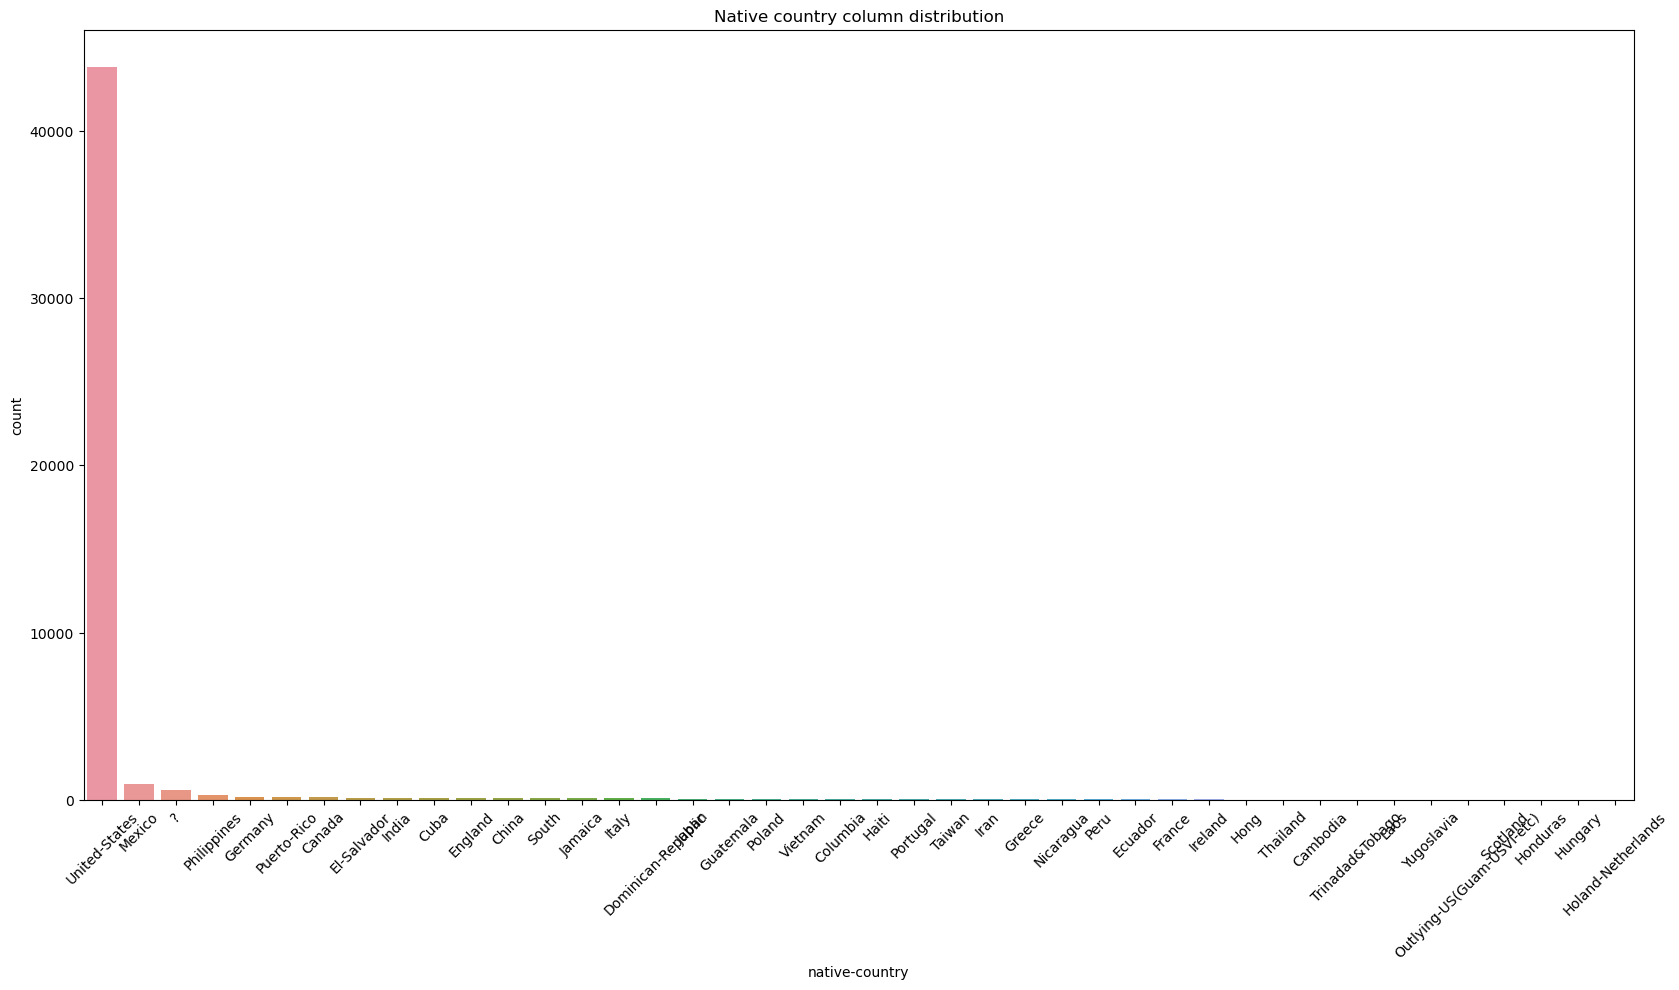

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(data=adult_df, x='native-country', order=adult_df['native-country'].value_counts().index)
plt.title('Native country column distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> 90% of the data's native-country is 'United States'. This shows that the 'native-country' column will have very less impact on the target variable.

###### <font color='blue'> Income Column

In [62]:
adult_df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

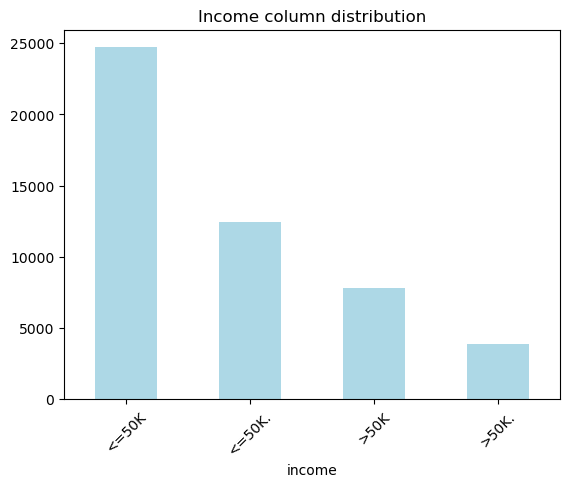

In [63]:
adult_df['income'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Income column distribution')
plt.xticks(rotation=45)
plt.show()

#### <font color='green'> The target column 'income' has inconsistent values.

##### <font color='blue'> Check for duplicate rows

In [64]:
duplicated_rows = adult_df[adult_df.duplicated()]
duplicated_rows.shape

(29, 15)

##### Get the number of rows that has atleast one null value

In [65]:
null_rows = adult_df[adult_df.isnull().any(axis=1)]
null_rows.shape

(1221, 15)

#### Lets do label encoding to find the correlation of the columns 

### <font color='blue'>Label Encoding
   <font color='blue'> Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. It assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()
df_encoded = adult_df.apply(label_encoder.fit_transform)

In [67]:
# Compute correlation of the dataframe with the target column 'income'
df_encoded.corr()['income']

age               0.205173
workclass         0.085754
fnlwgt           -0.006311
education         0.068523
education-num     0.291074
marital-status   -0.171481
occupation        0.091541
relationship     -0.223432
race              0.064000
sex               0.187216
capital-gain      0.295589
capital-loss      0.139770
hours-per-week    0.200008
native-country    0.038546
income            1.000000
Name: income, dtype: float64

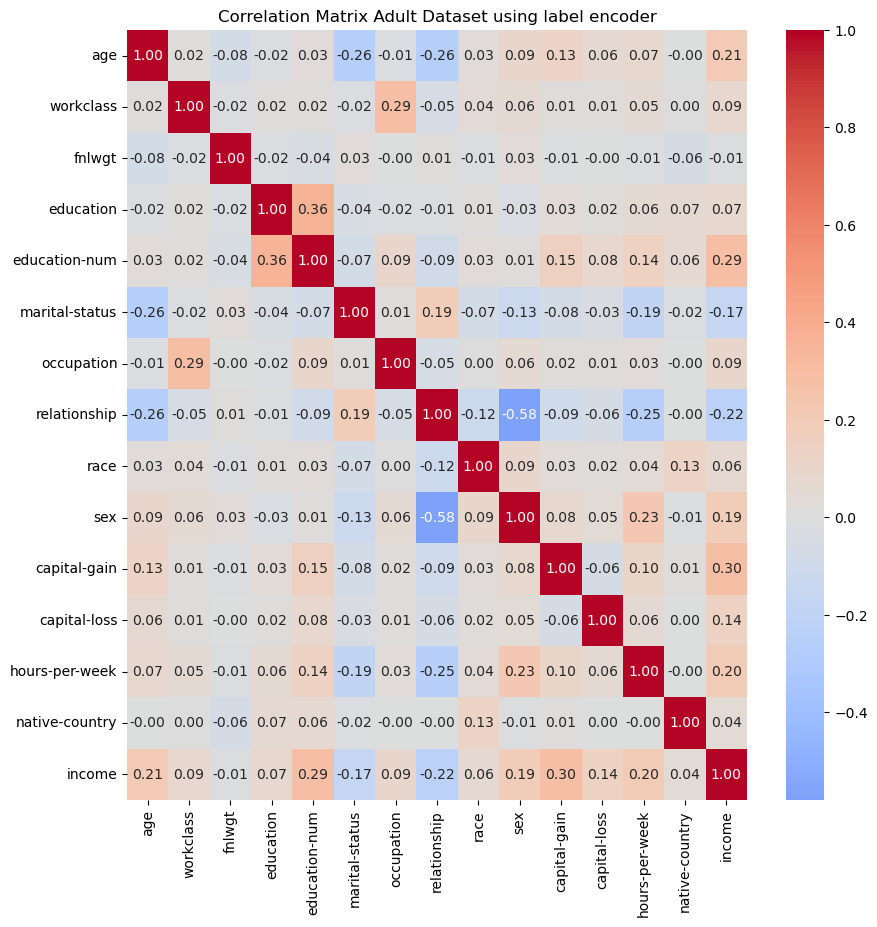

In [68]:
c_matrix = df_encoded.corr()
plt.figure(figsize=(10, 10))

# Generate a heatmap
sns.heatmap(c_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)

# Display the plot
plt.title('Correlation Matrix Adult Dataset using label encoder')
plt.show()

##### calculate the corelation of 'native-country' with other columns

In [69]:
for col in df_encoded.columns:
    correlation = df_encoded[col].corr(df_encoded['native-country'])
    print('{} - {}'.format(col,correlation))

age - -0.0025163150921860447
workclass - 0.0015996699898076906
fnlwgt - -0.056929085513908205
education - 0.06618109706982764
education-num - 0.06245745484576196
marital-status - -0.019584286092771772
occupation - -0.0032126595107528602
relationship - -0.0038971002447341623
race - 0.1306201834552991
sex - -0.008982922083038363
capital-gain - 0.007699742016255485
capital-loss - 0.0001355216992898868
hours-per-week - -0.00037653409528217943
native-country - 1.0
income - 0.03854647285435654


##### calculate the corelation of 'workclass' with other columns

In [70]:
for col in df_encoded.columns:
    correlation = df_encoded[col].corr(df_encoded['workclass'])
    print('{} - {}'.format(col,correlation))   

age - 0.01624760468085433
workclass - 0.9999999999999999
fnlwgt - -0.024254823748280356
education - 0.01566412935469023
education-num - 0.015435648986361244
marital-status - -0.021335794052605467
occupation - 0.2912239554508624
relationship - -0.04799352904282933
race - 0.043965175920955384
sex - 0.058774845950166896
capital-gain - 0.00989878692348721
capital-loss - 0.010076613369563534
hours-per-week - 0.05245324706908178
native-country - 0.0015996699898076906
income - 0.08575379306012747


##### calculate the corelation of 'occupation' with other columns

In [71]:
for col in df_encoded.columns:
    correlation = df_encoded[col].corr(df_encoded['occupation'])
    print('{} - {}'.format(col,correlation))

age - -0.014721427410372636
workclass - 0.2912239554508624
fnlwgt - -0.0011689074597346178
education - -0.02151463101364363
education-num - 0.08797732556520917
marital-status - 0.009485531014616914
occupation - 1.0
relationship - -0.05115423884319596
race - 0.001503533731986597
sex - 0.05711895370110713
capital-gain - 0.016423601454553825
capital-loss - 0.014978481630849243
hours-per-week - 0.029454843901192802
native-country - -0.0032126595107528602
income - 0.09154089163665512


##### <font color='green'><b> Based on the label encoding, and its correlation matrix, its clear that, the independent features have less correlation with the target. The features 'capital-gain' and 'education-num' have the highest correlation with the target 'income'.

### <font color='green'>Data cleaning suggestions based on the observations from EDA, univariate analysis, and label encoding </font>
<font color='green'> 
     <ol>
        <li>Delete duplicate rows - 29 duplicate rows are there in the dataset </li>
        <li>‘Income’ column has 4 values - <=50K, <=50K., >50K, >50K. - Need to make the values consistent across the dataset </li>
        <li>‘Workclass’, ‘occupation’ and ‘native-country’ columns have inconsistent data ‘?’. Replace them with ‘null’</li>
        <li> When, ‘Workclass’ == never-worked, the ‘occupation’ can be 'None'</li>
        <li>Fill the null values of 'native-country' column based on 'race' column</li>
        <li>Group rare categories of the 'native-country' column and mark it as 'others' </li>
        <li>Fill the null values of 'workclass' column based on 'education' column</li>
        <li>Fill the null values of 'occupation' column based on 'workclass' column</li>
        <li>Group rare categories of the 'occupation' column and add them to the 'other-services' </li>
        <li>Group different values of education as </li>
            <ul>
            <li>Elementary            -   1st-4th and 5th-6th
            <li>Middle/High School    -   7th-8th, 9th, 10th, 11th, HS-grad
            <li>Bachelors             - Bachelors and Some-college
            </ul>
        <li>Delete the 'education-num' column as it is numerice duplicate of the 'education' column </li>
        <li>Change the datatype of object columns to category </li>
         <li>Standardize the categorical columns </li>
         <li>Map the values of 'gender' column to 0 and 1 and change the datatype to boolean</li>
         <li>Map the values of 'income' column to 0 and 1 and change the datatype to boolean</li>
</ol> </font>

### <font color='blue'> Data Cleaning

##### 1. Delete duplicate rows - 29 duplicate rows are there in the dataset

In [72]:
adult_df.drop_duplicates(inplace=True)

##### 2. ‘Income’ column has 4 values - <=50K, <=50K., >50K, >50K. - Need to make the values consistent across the dataset

In [73]:
replace_dict = {'<=50K.':'<=50K', '>50K.':'>50K' }
adult_df['income'] = adult_df['income'].replace(replace_dict)

##### 3. ‘Workclass’, ‘occupation’ and ‘native-country’ columns have inconsistent data ‘?’. Replace them with ‘null’

In [74]:
adult_df = adult_df.replace('?',np.nan)

##### Get the dataframe in which both 'workclass' and 'occupation' are null

In [75]:
df = null_rows[null_rows['workclass'].isna() & null_rows['occupation'].isna()]
df.shape

(963, 15)

##### 4. When, ‘Workclass’ == never-worked, the ‘occupation’ can be 'None'

In [76]:
fill_values = {'Never-worked': 'No Job'}
adult_df['occupation'] = adult_df['occupation'].fillna(adult_df['workclass'].map(fill_values))

##### 5. Fill the null values of 'native-country' column based on 'race' column

In [77]:
adult_df['native-country'] = adult_df.groupby('race')['native-country'].ffill()

##### 6. Group rare categories of the 'native-country' column and mark it as 'others'

In [78]:
# Group rare native-country values into 'other'
top_countries = adult_df['native-country'].value_counts().nlargest(10).index
adult_df['native-country'] = adult_df['native-country'].apply(lambda x: x if x in top_countries else 'other')

##### 7. Fill the null values of 'workclass' column based on 'education' column

In [79]:
adult_df['workclass'] = adult_df.groupby('education')['workclass'].ffill()

##### 8. Fill the null values of 'occupation' column based on 'workclass' column

In [80]:
adult_df['occupation'] = adult_df.groupby('workclass')['occupation'].ffill()

##### 9. Group rare categories of the 'occupation' column and add them to the 'other-services'

In [81]:
# Group rare occupation values into 'other-service'
top_occupation = adult_df['occupation'].value_counts().nlargest(10).index
adult_df['occupation'] = adult_df['occupation'].apply(lambda x: x if x in top_occupation else 'Other-service')

##### 10. Group different values of education as
<ul> <li> Elementary - 1st-4th and 5th-6th
<li> Middle/High School - 7th-8th, 9th, 10th, 11th, HS-grad
<li> Bachelors - Bachelors and Some-college
</ul>

In [82]:
education_dict = {
    '1st-4th' : 'Elementary School',
    '5th-6th' : 'Elementary School',
    '7th-8th' : 'Middle/High School',
    '9th' : 'Middle/High School',
    '10th' : 'Middle/High School',
    '11th' : 'Middle/High School',
    'HS-grad' : 'Middle/High School',
    '12th' : 'Middle/High School',
    'Some-college' : 'Bachelors'    
}
adult_df['education'] = adult_df['education'].replace(education_dict)

##### 11. Delete the 'education-num' column as it is numerice duplicate of the 'education' column

In [83]:
adult_df.drop('education-num',axis=1,inplace=True)

##### 12. Change the datatype of object columns to category

In [84]:
for col in categorical_cols:
    adult_df[col] = adult_df[col].astype('category')

##### 13. Standardize the categorical columns

In [85]:
for col in categorical_cols:
    adult_df[col] = adult_df[col].str.strip().str.lower()

##### 14. Map the values of gender column to 0 and 1 and change the datatype to boolean

In [87]:
sex_dict={'female':0,'male':1}
adult_df['sex']=adult_df['sex'].map(sex_dict)
adult_df['sex'] = adult_df['sex'].astype('bool')

##### 15. Map the values of income column to 0 and 1 and change the datatype to boolean

In [88]:
income_dict={'<=50k':0,'>50k':1}
adult_df['income']=adult_df['income'].map(income_dict)
adult_df['income'] = adult_df['income'].astype('bool')

In [89]:
adult_df['income'].value_counts()

income
False    37128
True     11685
Name: count, dtype: int64

#### After Data Cleaning

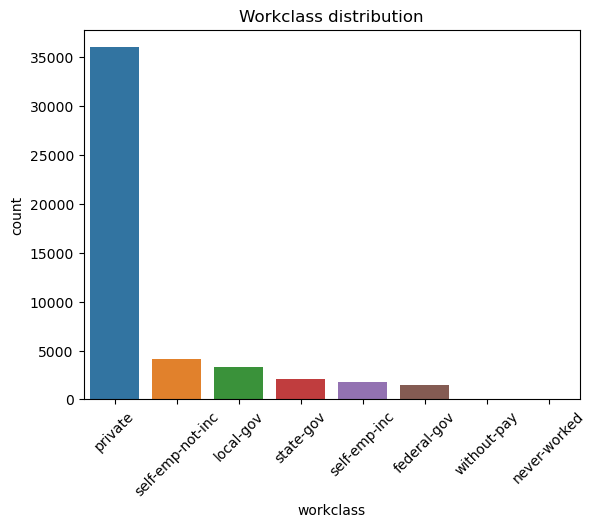

In [90]:
sns.countplot(data=adult_df, x='workclass', order=adult_df['workclass'].value_counts().index)
plt.title('Workclass distribution')
plt.xticks(rotation=45)
plt.show()

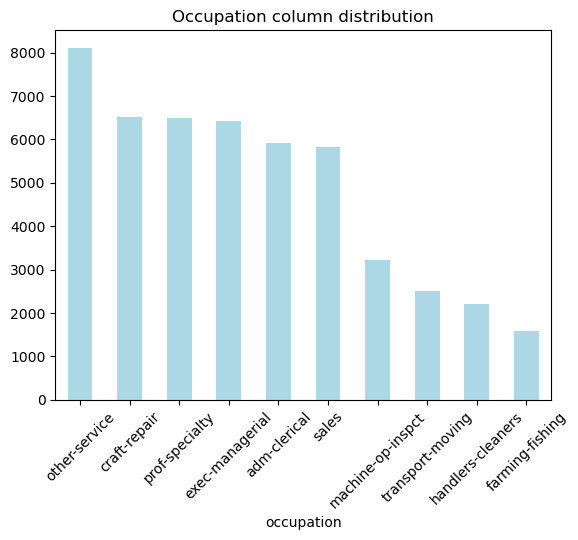

In [91]:
adult_df['occupation'].value_counts().plot(kind='bar',color='lightblue')
plt.title('Occupation column distribution')
plt.xticks(rotation=45)
plt.show()

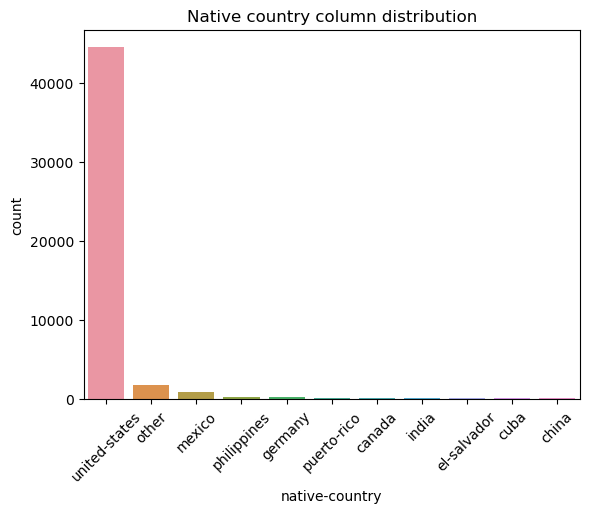

In [92]:
sns.countplot(data=adult_df, x='native-country', order=adult_df['native-country'].value_counts().index)
plt.title('Native country column distribution')
plt.xticks(rotation=45)
plt.show()

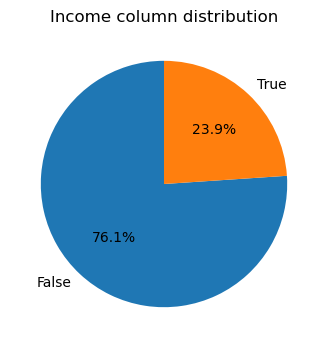

In [93]:
cnt = adult_df['income'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%', startangle=90)
plt.title('Income column distribution')
plt.show()

### <font color='blue'>Bivariate Analysis

#### Bivariate analysis investigates the relationship between two variables. The goal is to determine if and how one variable influences or correlates with another.
#### For the adult income dataset, let us analyze the following pairs:
<ul>
    <li> age vs income </li>
    <li> workclass vs income </li>
    <li> education vs income </li>
    <li> capital-gain vs income </li>
    <li> capital-loss vs income </li>
    <li> workclass vs occupation </li>
    <li> age vs hours-per-week </li>
    <li> hours-per-week  vs income </li>
    <li> sex vs income </li>

#### <font color='blue'> Age vs Income

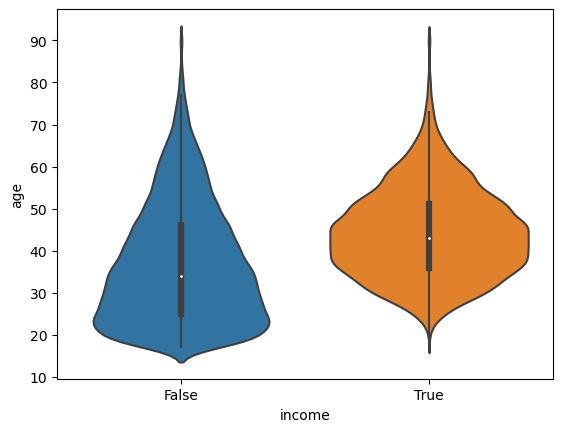

In [94]:
sns.violinplot(data=adult_df, x='income', y='age')
plt.show()

#### <font color='blue'> Workclass vs Income

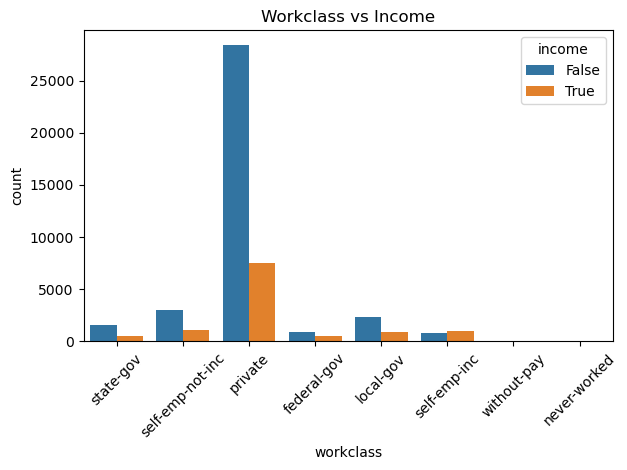

In [95]:
sns.countplot(data=adult_df, x='workclass', hue='income')
plt.xticks(rotation=45)
plt.title('Workclass vs Income')
plt.tight_layout()
plt.show()

#### <font color='blue'> Education vs Income

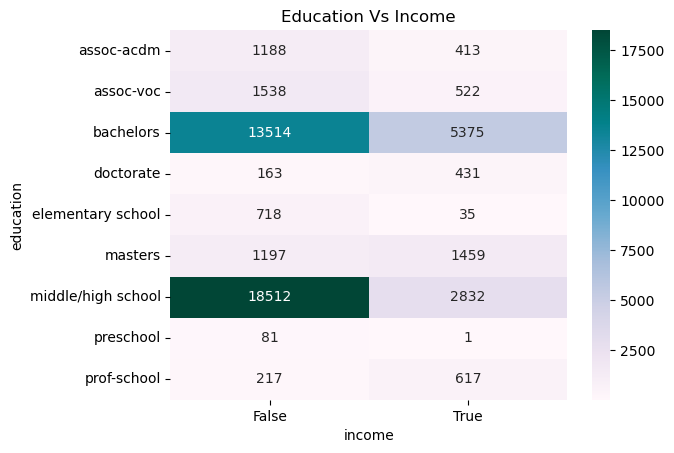

In [96]:
ct = pd.crosstab(adult_df['education'], adult_df['income'])
# Plot heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='PuBuGn')
plt.title('Education Vs Income')
plt.show()

#### <font color='blue'> Capital-gain vs Income

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


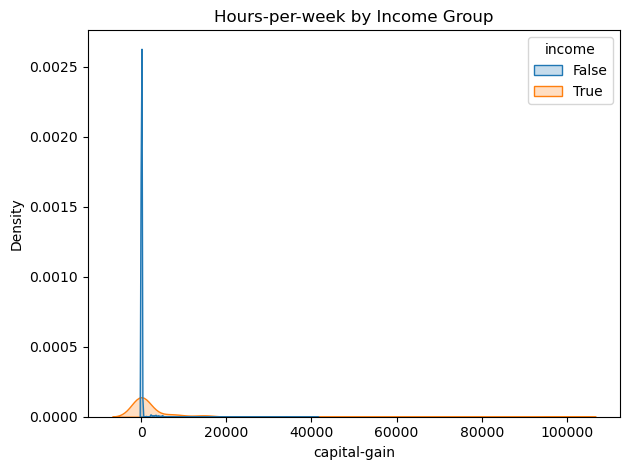

In [97]:
sns.kdeplot(data=adult_df, x='capital-gain', hue='income', fill=True, common_norm=False)

plt.title('Hours-per-week by Income Group')
plt.tight_layout()
plt.show()

#### <font color='blue'> Capital-loss vs Income

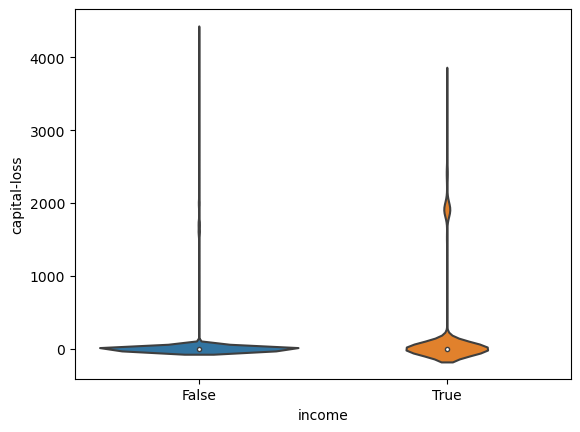

In [98]:
sns.violinplot(data=adult_df, x='income', y='capital-loss')
plt.show()

#### <font color='blue'> Workclass vs Occupation

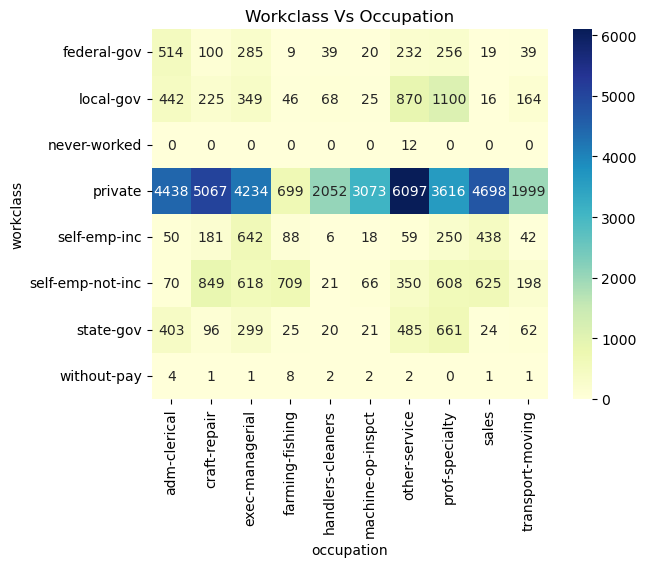

In [99]:
ct = pd.crosstab(adult_df['workclass'], adult_df['occupation'])

# Plot heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Workclass Vs Occupation')
plt.show()

#### <font color='blue'> Age vs Hours-per-week

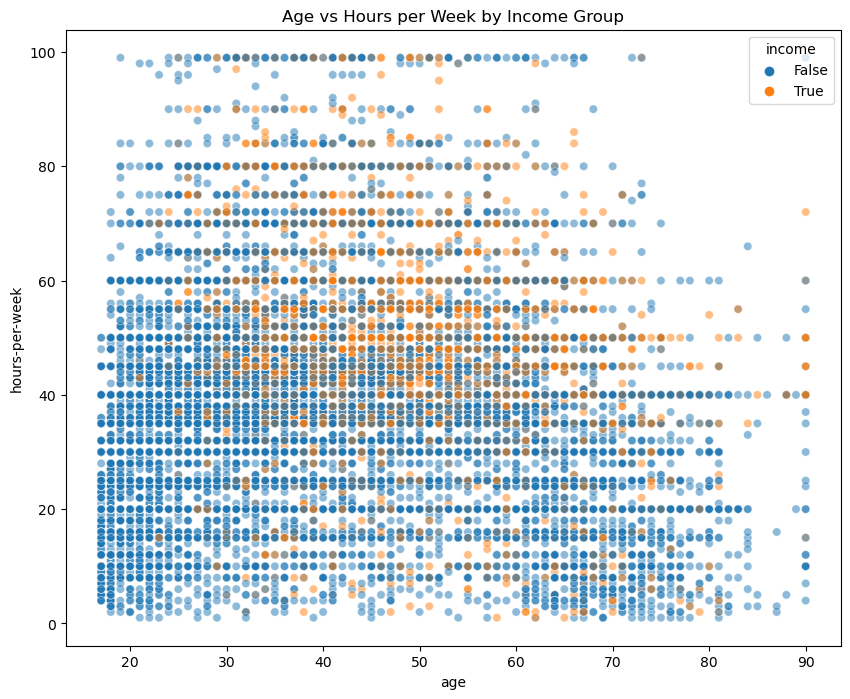

In [100]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=adult_df, x='age', y='hours-per-week', hue='income', alpha=0.5)
plt.title('Age vs Hours per Week by Income Group')
plt.show()

#### <font color='blue'> Hours-per-week vs Income

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


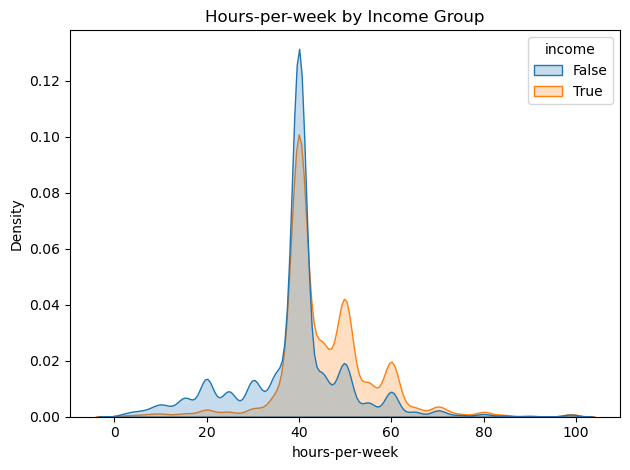

In [101]:
sns.kdeplot(data=adult_df, x='hours-per-week', hue='income', fill=True, common_norm=False)

plt.title('Hours-per-week by Income Group')
plt.tight_layout()
plt.show()

#### <font color='blue'> Gender vs Income

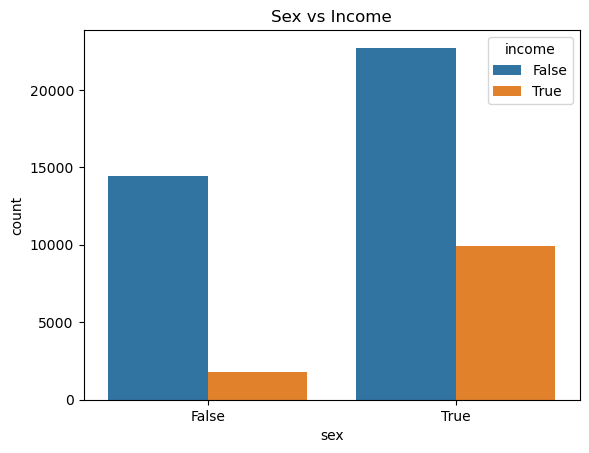

In [102]:
sns.countplot(data=adult_df, x='sex', hue='income')
plt.title('Sex vs Income')
plt.show()

### <font color='blue'>Multivariate Analysis </font>
#### Multivariate Analysis refers to a set of statistical techniques used to analyze data that involves multiple variables at the same time. The goal is to understand relationships between variables, how they affect each other, or how they influence an outcome of interest.
##### Common Types of Multivariate Analysis
<ul>
    <li> Multiple Regression - One dependent variable, multiple independent variables
    <li> MANOVA (Multivariate Analysis of Variance) - Multiple dependent variables, categorical independent variable(s)
    <li> Factor Analysis -	To reduce dimensionality and identify latent variables
    <li> Principal Component Analysis (PCA) - Data reduction and pattern recognition
    <li> Canonical Correlation - Exploring relationships between two sets of variables
    <li> Discriminant Analysis - Classifying cases into groups
    <li> Cluster Analysis -	Grouping observations into clusters

In [103]:
numerical_columns=list(adult_df.select_dtypes(include='number'))
numerical_columns.append('income')

In [104]:
#sns.pairplot(adult_df[numerical_columns],hue='income')
#plt.title('Pair plot for numerical columns')
#plt.show()

### <font color='blue'> Outlier Detection </font>
##### An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses. The analysis for outlier detection is referred to as outlier mining. Outliers can skew the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.Detecting outliers depends on the type of data and context, but here are the most common and effective methods, especially for numerical features. 
Methods to detect outliers are:
<ol>
    <li>Interquartile Range (IQR) Method </li>
    <li>Z-Score Method </li>
    <li>Visuals - Boxplot </li>
    <li>Isolation Forest / One class SVM </li>
    <li>DBSCAN </li>
</ol>

#### <font color='blue'> 1. Boxplot Method

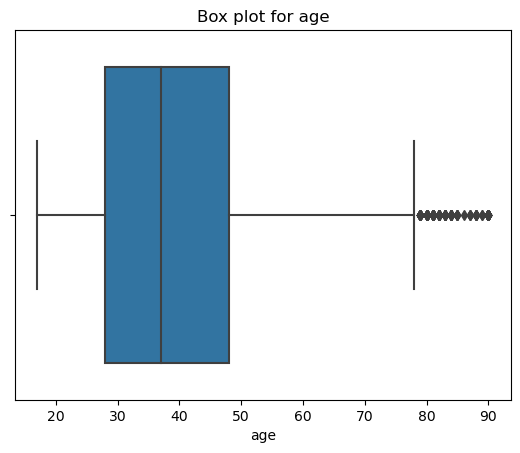

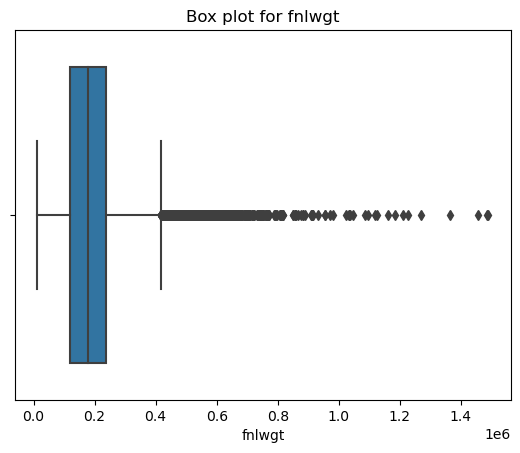

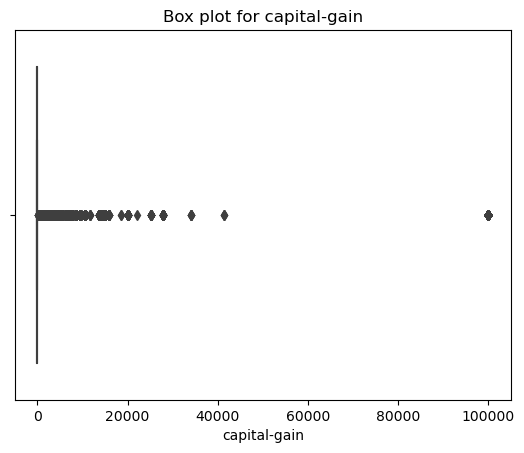

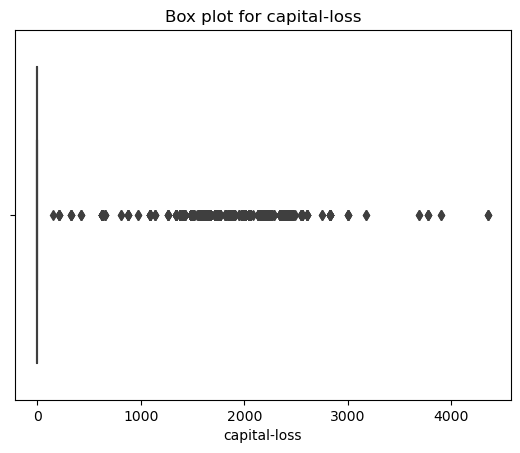

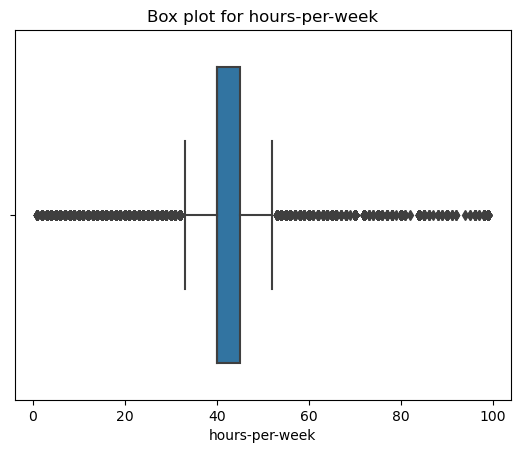

In [105]:
numerical_columns=list(adult_df.select_dtypes(include='number'))
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=adult_df[col])
    plt.title('Box plot for {}'.format(col))
plt.show()

#### <font color='blue'> 2. IQR Method

In [106]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# detect outliers in numerical columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(adult_df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in age: 215
Number of outliers in fnlwgt: 1453
Number of outliers in capital-gain: 4035
Number of outliers in capital-loss: 2282
Number of outliers in hours-per-week: 13489


#### <font color='blue'> 3. Z-Score Method

In [107]:
from scipy.stats import zscore

for col in numerical_columns:
    adult_df['z_scores'] = zscore(adult_df[col])
    outliers = adult_df[adult_df[col].abs() > 3].copy()
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in age: 48813
Number of outliers in fnlwgt: 48813
Number of outliers in capital-gain: 4035
Number of outliers in capital-loss: 2282
Number of outliers in hours-per-week: 48674


In [108]:
adult_df.drop(columns='z_scores',inplace=True)

### <font color='blue'> Outlier Treatment </font>
##### 
Few methods to treat outliers are:
<ol>
    <li>Domain Knowledge </li>
    <li>Log Transformation </li>
    <li>Isolation Forest </li>
</ol>

#### <font color='blue'> 1. Domain Knowledge

##### When the 'workclass' is 'never-worked', then 'hours-per-week' should be 0

In [109]:
adult_df[adult_df['workclass']=='never-worked']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,never-worked,206359,middle/high school,never-married,other-service,own-child,white,True,0,0,40,united-states,False
10845,23,never-worked,188535,middle/high school,divorced,other-service,not-in-family,white,True,0,0,35,united-states,False
14772,17,never-worked,237272,middle/high school,never-married,other-service,own-child,white,True,0,0,30,united-states,False
20337,18,never-worked,157131,middle/high school,never-married,other-service,own-child,white,False,0,0,10,united-states,False
23232,20,never-worked,462294,bachelors,never-married,other-service,own-child,black,True,0,0,40,united-states,False
32304,30,never-worked,176673,middle/high school,married-civ-spouse,other-service,wife,black,False,0,0,40,united-states,False
32314,18,never-worked,153663,bachelors,never-married,other-service,own-child,white,True,0,0,4,united-states,False
32317,63,never-worked,126540,bachelors,divorced,other-service,not-in-family,white,False,0,0,5,united-states,False
41346,17,never-worked,131593,middle/high school,never-married,other-service,own-child,black,False,0,0,20,united-states,False
44168,20,never-worked,273905,middle/high school,married-spouse-absent,other-service,other-relative,white,True,0,0,35,united-states,False


In [110]:
adult_df.loc[adult_df.workclass=='never-worked','hours-per-week']=0

In [111]:
adult_df[adult_df['workclass']=='never-worked']

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,never-worked,206359,middle/high school,never-married,other-service,own-child,white,True,0,0,0,united-states,False
10845,23,never-worked,188535,middle/high school,divorced,other-service,not-in-family,white,True,0,0,0,united-states,False
14772,17,never-worked,237272,middle/high school,never-married,other-service,own-child,white,True,0,0,0,united-states,False
20337,18,never-worked,157131,middle/high school,never-married,other-service,own-child,white,False,0,0,0,united-states,False
23232,20,never-worked,462294,bachelors,never-married,other-service,own-child,black,True,0,0,0,united-states,False
32304,30,never-worked,176673,middle/high school,married-civ-spouse,other-service,wife,black,False,0,0,0,united-states,False
32314,18,never-worked,153663,bachelors,never-married,other-service,own-child,white,True,0,0,0,united-states,False
32317,63,never-worked,126540,bachelors,divorced,other-service,not-in-family,white,False,0,0,0,united-states,False
41346,17,never-worked,131593,middle/high school,never-married,other-service,own-child,black,False,0,0,0,united-states,False
44168,20,never-worked,273905,middle/high school,married-spouse-absent,other-service,other-relative,white,True,0,0,0,united-states,False


##### The 'fnlwgt' column has nothing to do with the 'income'. Lets drop the column

In [112]:
adult_df.drop(columns='fnlwgt',inplace=True)

In [113]:
adult_df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [114]:
adult_df['capital-gain'].value_counts()

capital-gain
0        44778
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

In [115]:
adult_df['capital-loss'].value_counts()

capital-loss
0       46531
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

In [116]:
adult_df['capital-net']=adult_df['capital-gain']-adult_df['capital-loss']

In [117]:
adult_df['capital-net'].value_counts()

capital-net
 0        42496
 15024      513
 7688       410
 7298       364
-1902       304
          ...  
-2201         1
-155          1
 1639         1
-2080         1
 6612         1
Name: count, Length: 221, dtype: int64

In [118]:
adult_df.drop(columns='capital-net',inplace=True)

#### <font color='blue'> 2. Log transformation </font>
##### 'capital-gain' and 'capital-loss' columns are extremely right skewed. So lets apply log transformation for these two columns

In [119]:
adult_df['capital-gain'] = adult_df['capital-gain'].apply(lambda x: np.log1p(x))
adult_df['capital-loss'] = adult_df['capital-loss'].apply(lambda x: np.log1p(x))

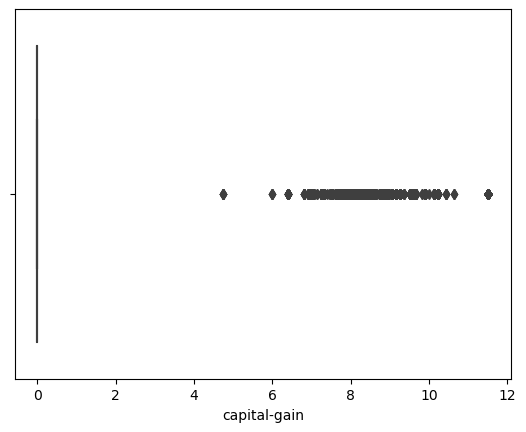

In [120]:
sns.boxplot(x=adult_df['capital-gain'])
plt.show()

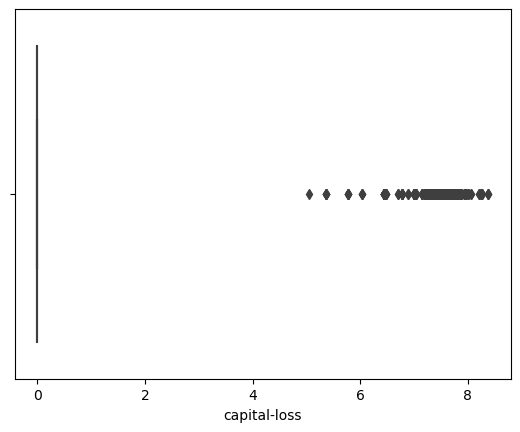

In [121]:
sns.boxplot(x=adult_df['capital-loss'])
plt.show()

#### <font color='blue'>3. Isolation Forest</font>
##### Isolation Forest is an unsupervised anomaly detection algorithm that identifies outliers by isolating them using an ensemble of binary decision trees. It works by randomly splitting data points until they are isolated, with anomalies typically requiring fewer splits than normal data points. The algorithm is known for its speed and efficiency, especially on large datasets. 

In [122]:
from sklearn.ensemble import IsolationForest

numerical_columns = list(adult_df.select_dtypes(include='number'))
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(adult_df[numerical_columns])
adult_df['outlier'] = outliers

# Option to remove
#df_clean = adult_df[adult_df['outlier'] == 1].drop('outlier', axis=1)
adult_df['outlier'].value_counts()

outlier
 1    48324
-1      489
Name: count, dtype: int64

In [123]:
adult_df[adult_df['outlier']==-1]

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,outlier
157,71,self-emp-not-inc,bachelors,separated,sales,unmarried,black,True,0.000000,7.504942,2,united-states,False,-1
222,90,private,middle/high school,never-married,other-service,not-in-family,black,True,0.000000,7.699389,40,united-states,False,-1
272,50,self-emp-not-inc,masters,married-civ-spouse,farming-fishing,husband,white,True,7.786552,0.000000,98,united-states,False,-1
387,44,private,bachelors,married-civ-spouse,adm-clerical,wife,white,False,0.000000,7.789869,6,united-states,True,-1
786,61,self-emp-not-inc,middle/high school,married-civ-spouse,farming-fishing,husband,white,True,0.000000,7.763446,50,united-states,False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48473,68,private,bachelors,married-civ-spouse,adm-clerical,husband,white,True,0.000000,7.407924,10,united-states,True,-1
48582,61,self-emp-not-inc,masters,married-civ-spouse,prof-specialty,husband,white,True,11.512925,0.000000,30,united-states,True,-1
48629,59,self-emp-inc,prof-school,married-civ-spouse,exec-managerial,husband,white,True,11.512925,0.000000,84,united-states,True,-1
48726,52,private,bachelors,married-civ-spouse,exec-managerial,husband,white,True,0.000000,7.551187,65,united-states,True,-1


In [124]:
adult_df_cleaned = adult_df[adult_df['outlier'] == 1].drop('outlier', axis=1)

In [125]:
adult_df_cleaned.shape

(48324, 13)

### <font color='blue'> Feature Engineering

#### Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

In the context of machine learning,

•	a feature (also known as a variable or attribute) is an individual measurable property or characteristic of a data point that is used as input for a machine learning algorithm.

•	Features can be numerical, categorical, or text-based, and they represent different aspects of the data that are relevant to the problem

Processes Involved in Feature Engineering:

**1. Feature Creation**

Feature Creation is the process of generating new features based on domain knowledge or by observing patterns in the data. It is a form of feature engineering that can significantly improve the performance of a machine-learning model.

**Types of Feature Creation:**

**Domain-Specific**: Creating new features based on domain knowledge, such as creating features based on business rules or industry standards.

**Data-Driven:** Creating new features by observing patterns in the data, such as calculating aggregations or creating interaction features.

**Synthetic:** Generating new features by combining existing features or synthesizing new data points.

**2. Feature Transformation**

Feature Transformation is the process of transforming the features into a more suitable representation for the machine learning model. This is done to ensure that the model can effectively learn from the data.

**Types of Feature Transformation:**

**Normalization:** Rescaling the features to have a similar range, such as between 0 and 1, to prevent some features from dominating others.

**Scaling:** Scaling is a technique used to transform numerical variables to have a similar scale, so that they can be compared more easily. Rescaling the features to have a similar scale, such as having a standard deviation of 1, to make sure the model considers all features equally.

**Encoding:** Transforming categorical features into a numerical representation. Examples are one-hot encoding and label encoding.

**Transformation:** Transforming the features using mathematical operations to change the distribution or scale of the features. Examples are logarithmic, square root, and reciprocal transformations. Apply mathematical transformations like log, square root, or Box-Cox to make the data more normally distributed, which can help in reducing the impact of outliers.

##### <font color='blue'>One hot encoding
   <font color='blue'> One-hot encoding is a process that transforms categorical data into a numerical format suitable for machine learning algorithms. It creates a binary vector for each category, where a '1' indicates the presence of that category and '0' indicates its absence. 

In [127]:
adult_df_cleaned['income'].value_counts()

income
False    36876
True     11448
Name: count, dtype: int64

In [128]:
df_onehot_encoded = pd.get_dummies(adult_df_cleaned,drop_first=True)
corr_matrix = df_onehot_encoded.corr()
corr_matrix

,age,sex,capital-gain,capital-loss,hours-per-week,income,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,...,native-country_china,native-country_cuba,native-country_el-salvador,native-country_germany,native-country_india,native-country_mexico,native-country_other,native-country_philippines,native-country_puerto-rico,native-country_united-states
age,1.000000,0.086892,0.109166,0.026301,0.081048,0.228638,0.059937,-0.017626,-0.189697,0.094780,...,0.010886,0.031626,-0.022384,-0.001098,-0.001543,-0.049777,0.002172,0.005506,0.005275,0.012325
sex,0.086892,1.000000,0.065415,0.039370,0.229715,0.213330,-0.041652,-0.002810,-0.059770,0.077220,...,0.006400,-0.003905,-0.001109,-0.011106,0.025750,0.032125,-0.007678,-0.010636,-0.008861,-0.008182
capital-gain,0.109166,0.065415,1.000000,-0.060385,0.090162,0.288431,0.004133,-0.004616,-0.042594,0.066230,...,-0.000381,-0.004411,-0.006730,0.006998,0.006026,-0.021843,-0.006706,-0.001291,-0.007331,0.016040
capital-loss,0.026301,0.039370,-0.060385,1.000000,0.038651,0.132487,0.011630,-0.003249,-0.018742,0.023324,...,0.011399,-0.001380,-0.006294,-0.003893,0.000712,-0.017404,-0.002678,0.002501,0.000784,0.009369
hours-per-week,0.081048,0.229715,0.090162,0.038651,1.000000,0.226311,-0.000775,-0.052478,-0.084430,0.113559,...,-0.007857,-0.001578,-0.018227,0.003187,0.005036,-0.002205,0.000917,-0.005327,-0.007107,0.007310
income,0.228638,0.213330,0.288431,0.132487,0.226311,1.000000,0.031096,-0.008781,-0.111394,0.130900,...,0.006520,0.000973,-0.021681,0.006124,0.021574,-0.061833,-0.016633,0.010190,-0.017990,0.036230
workclass_local-gov,0.059937,-0.041652,0.004133,0.011630,-0.000775,0.031096,1.000000,-0.004254,-0.454058,-0.051693,...,-0.007743,-0.002208,-0.008253,0.001280,-0.011384,-0.024838,-0.023031,-0.005628,0.000585,0.035305
workclass_never-worked,-0.017626,-0.002810,-0.004616,-0.003249,-0.052478,-0.008781,-0.004254,1.000000,-0.026515,-0.003019,...,-0.000822,-0.000846,-0.000903,-0.001031,-0.000914,-0.002243,-0.003113,-0.001281,-0.000977,0.004894
workclass_private,-0.189697,-0.059770,-0.042594,-0.018742,-0.084430,-0.111394,-0.454058,-0.026515,1.000000,-0.322227,...,0.001994,-0.001505,0.022489,-0.000882,-0.003836,0.050797,0.019786,0.012700,0.009383,-0.046671
workclass_self-emp-inc,0.094780,0.077220,0.066230,0.023324,0.113559,0.130900,-0.051693,-0.003019,-0.322227,1.000000,...,0.002939,0.014810,-0.007046,0.001221,0.010207,-0.018419,0.006936,-0.010014,-0.010060,0.002132


In [130]:
df_onehot_encoded.columns

Index(['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income', 'workclass_local-gov', 'workclass_never-worked',
       'workclass_private', 'workclass_self-emp-inc',
       'workclass_self-emp-not-inc', 'workclass_state-gov',
       'workclass_without-pay', 'education_assoc-voc', 'education_bachelors',
       'education_doctorate', 'education_elementary school',
       'education_masters', 'education_middle/high school',
       'education_preschool', 'education_prof-school',
       'marital-status_married-af-spouse', 'marital-status_married-civ-spouse',
       'marital-status_married-spouse-absent', 'marital-status_never-married',
       'marital-status_separated', 'marital-status_widowed',
       'occupation_craft-repair', 'occupation_exec-managerial',
       'occupation_farming-fishing', 'occupation_handlers-cleaners',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_prof-specialty', 'occupation_sales',
       'occupation_

In [131]:
df_onehot_encoded.head()

,age,sex,capital-gain,capital-loss,hours-per-week,income,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,...,native-country_china,native-country_cuba,native-country_el-salvador,native-country_germany,native-country_india,native-country_mexico,native-country_other,native-country_philippines,native-country_puerto-rico,native-country_united-states
0,39,True,7.684784,0.0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,50,True,0.000000,0.0,13,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,38,True,0.000000,0.0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,53,True,0.000000,0.0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,28,False,0.000000,0.0,40,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [132]:
df_onehot_encoded.dtypes

age                                       int64
sex                                        bool
capital-gain                            float64
capital-loss                            float64
hours-per-week                            int64
income                                     bool
workclass_local-gov                        bool
workclass_never-worked                     bool
workclass_private                          bool
workclass_self-emp-inc                     bool
workclass_self-emp-not-inc                 bool
workclass_state-gov                        bool
workclass_without-pay                      bool
education_assoc-voc                        bool
education_bachelors                        bool
education_doctorate                        bool
education_elementary school                bool
education_masters                          bool
education_middle/high school               bool
education_preschool                        bool
education_prof-school                   

In [133]:
df_onehot_encoded.isnull().sum()

age                                     0
sex                                     0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
income                                  0
workclass_local-gov                     0
workclass_never-worked                  0
workclass_private                       0
workclass_self-emp-inc                  0
workclass_self-emp-not-inc              0
workclass_state-gov                     0
workclass_without-pay                   0
education_assoc-voc                     0
education_bachelors                     0
education_doctorate                     0
education_elementary school             0
education_masters                       0
education_middle/high school            0
education_preschool                     0
education_prof-school                   0
marital-status_married-af-spouse        0
marital-status_married-civ-spouse       0
marital-status_married-spouse-abse

#### <font color='blue'> Standardization

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df_onehot_encoded.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df_onehot_encoded[numerical_columns])

# Check the result
df_standardized.describe()


,age,capital-gain,capital-loss,hours-per-week
count,4.832400e+04,4.832400e+04,4.832400e+04,4.832400e+04
mean,6.763713e-17,-1.882077e-17,5.881489e-17,-2.446700e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.586510e+00,-2.929131e-01,-2.061520e-01,-3.329755e+00
25%,-7.734839e-01,-2.929131e-01,-2.061520e-01,-3.174549e-02
50%,-1.082808e-01,-2.929131e-01,-2.061520e-01,-3.174549e-02
75%,6.308338e-01,-2.929131e-01,-2.061520e-01,3.805057e-01
max,3.809026e+00,4.497737e+00,5.365059e+00,4.832818e+00


#### <font color='blue'> Normalization

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_onehot_encoded.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df_onehot_encoded[numerical_columns])

# Check the result
df_normalized.describe()


,age,capital-gain,capital-loss,hours-per-week
count,48324.000000,48324.000000,48324.000000,48324.000000
mean,0.294041,0.061143,0.037003,0.407930
std,0.185340,0.208742,0.179496,0.122512
min,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.000000,0.000000,0.404040
50%,0.273973,0.000000,0.000000,0.404040
75%,0.410959,0.000000,0.000000,0.454545
max,1.000000,1.000000,1.000000,1.000000


Choosing between standardization and normalization during feature engineering depends on the characteristics of your data and the requirements of the machine learning algorithm you plan to use. Both techniques aim to scale the features to a similar range, but they do so in slightly different ways.

**How to choose:**

**Understand your data:**

**Examine the distribution of your features. If they are normally distributed, standardization may be more appropriate.**

If the features have different ranges, normalization might be beneficial.

**Consider the algorithm:**

Some algorithms are sensitive to the scale of input features. For example, k-nearest neighbors and neural networks often benefit from normalization.
Algorithms like linear regression or support vector machines might perform better with standardized features.

**Experiment and validate:**

Try both techniques and observe the impact on your model's performance using cross-validation or a separate validation set.
Consider the specific requirements of your machine learning model and the characteristics of your dataset.


### Lets use the standardized data to build our model

## <font color='blue'> Build the Model

### Split the data into test and train

In [137]:
from sklearn.model_selection import train_test_split
# Remove target column 'income' so that the remaining columns will be the features
X = df_standardized.drop('income', axis=1)  
y = df_standardized['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color='blue'> Logistic Regression </font>
#### Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors.

******** Classification report ******** 
               precision    recall  f1-score   support

       False       0.87      0.93      0.90      7332
        True       0.73      0.57      0.64      2333

    accuracy                           0.85      9665
   macro avg       0.80      0.75      0.77      9665
weighted avg       0.84      0.85      0.84      9665

******** Confusion Matrix ********


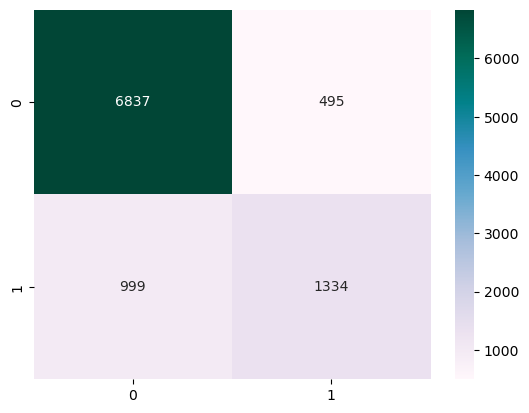

******** Accuracy Score ******** 0.8454216244180031


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# evaluate the model
y_pred = model.predict(X_test)

LogisticRegression_Acc = accuracy_score(y_test, y_pred)
print('******** Classification report ******** \n',classification_report(y_test, y_pred))
print('******** Confusion Matrix ********')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='PuBuGn')
plt.show()

print("******** Accuracy Score ********",LogisticRegression_Acc)

### <font color='blue'> Random Forest Classifier

******** Classification report ******** 
               precision    recall  f1-score   support

       False       0.88      0.92      0.90      7332
        True       0.70      0.62      0.66      2333

    accuracy                           0.84      9665
   macro avg       0.79      0.77      0.78      9665
weighted avg       0.84      0.84      0.84      9665

******** Confusion Matrix ********


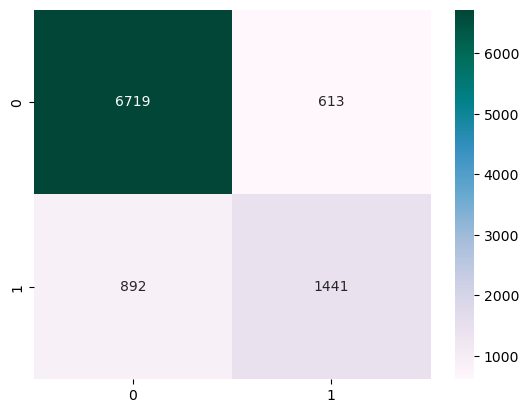

******** Accuracy Score ******** 0.8442834971546819


In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# train a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# evaluate the model
y_pred = rf.predict(X_test)

RandomForest_Acc = accuracy_score(y_test, y_pred)
print('******** Classification report ******** \n',classification_report(y_test, y_pred))
print('******** Confusion Matrix ********')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='PuBuGn')
plt.show()

print("******** Accuracy Score ********", RandomForest_Acc)

### <font color='blue'> XG Boosting

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.89      0.94      0.91      7332
        True       0.77      0.65      0.70      2333

    accuracy                           0.87      9665
   macro avg       0.83      0.79      0.81      9665
weighted avg       0.86      0.87      0.86      9665

******** CONFUSION MATRIX ********


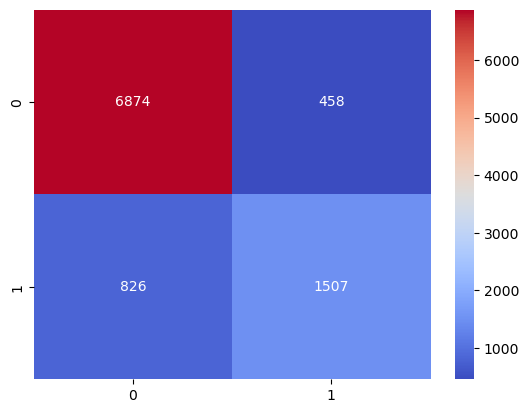

******** ACCURACY_SCORE ******** 0.8671495085359545


In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# evaluate the model
y_pred = xgb.predict(X_test)

XGBoost_Acc = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** CONFUSION MATRIX ********')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='coolwarm')
plt.show()
print('******** ACCURACY_SCORE ********', XGBoost_Acc)

### <font color='blue'>SVM

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.88      0.95      0.91      7332
        True       0.77      0.58      0.66      2333

    accuracy                           0.86      9665
   macro avg       0.82      0.76      0.78      9665
weighted avg       0.85      0.86      0.85      9665

******** CONFUSION MATRIX ********


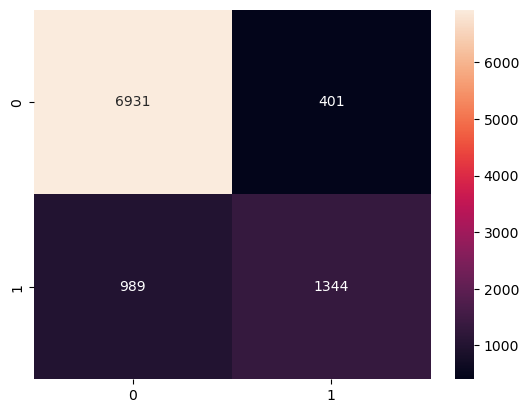

******** ACCURACY_SCORE ******** 0.8561821003621314


In [142]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

# Create and fit the SVM classifier
svc = SVC()
svc.fit(X_train, y_train)

# evaluate the model
y_pred = svc.predict(X_test)

SVM_Acc = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** CONFUSION MATRIX ********')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()
print('******** ACCURACY_SCORE ********', SVM_Acc)

## <font color='blue'> Hyper Parameter Tunning </font>
###### Hyperparameter tuning is the process of selecting the optimal values for a machine learning model's hyperparameters. Hyperparameters are configuration settings that control the learning process of the model.

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. 

| Technique                                | Pros                                                 | Cons                           | Best Use                                            |
| ---------------------------------------- | ---------------------------------------------------- | ------------------------------ | --------------------------------------------------- |
| **GridSearchCV**                         | Exhaustive, guaranteed best (within grid)            | Expensive, slow on large grids | Small datasets, or few hyperparams                  |
| **RandomizedSearchCV**                   | Fast, scalable, good coverage                        | Might miss exact best combo    | Large feature space, tight compute budget           |
| **Bayesian Optimization (e.g., Optuna)** | Smarter search, better results with fewer iterations | More complex setup             | When performance is critical and compute is limited |
| **Manual tuning**                        | Simple                                               | Time-consuming, not scalable   | For experienced practitioners or quick prototyping  |

##### Lets use GridSearchCV method for tuning our model.
GridSearchCV is often considered a “brute force” approach to hyperparameter optimization. It works by fitting the model using all possible combinations of predefined hyperparameter values. A grid of potential discrete values for each hyperparameter is created and the model is trained for each possible combination. The performance of each set is logged and the combination that produces the best results is selected.

### <font color='blue'> Tuned Random Forest </font>
##### This is a hyperparameter tuning utility from sklearn.model_selection that
        Tries all combinations of parameters you define
        Evaluates them using cross-validation
        Selects the best model based on the chosen scoring metric
<ul>
    <li> <b>estimator=rf</b>  the model you want to tune </li>
    <li> <b>param_grid_rf</b>  dictionary of hyperparameters and values you want to search over.</li>
    <ul><li> Number of trees (n_estimators)
        <li> Tree depth (max_depth)
        <li> Minimum samples to split a node (min_samples_split)
        <li> Minimum samples in a leaf (min_samples_leaf)
        <li> This creates a grid of combinations. If each parameter has 2 values → 2×3×2×2×2 = 48 combinations. Each will be evaluated using 5-fold cross-validation. </ul>
    <li> <b>cv=5</b>  means 5-fold cross-validation:</li>
    <ul><li> The training data is split into 5 parts.
        <li> For each parameter combination, the model is trained on 4 parts and validated on the 5th.
        <li> This process repeats 5 times, and the average accuracy is computed.
        <li> This ensures the results are robust and not overfitted.
    </ul>
    <li> <b>scoring='accuracy'</b>  Tells GridSearchCV to select best model based on accuracy — the proportion of correct predictions</li>
    <li> <b>n_jobs=-1</b>  Use all available CPU cores to train models in parallel. Greatly reduces the time needed to search large grids </li>
</ul>

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

Best RF Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.8618690830441039


In [144]:
y_pred = grid_rf.predict(X_test)
Tuned_RF_Acc = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** ACCURACY_SCORE ********', Tuned_RF_Acc)

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.88      0.95      0.91      7332
        True       0.79      0.59      0.67      2333

    accuracy                           0.86      9665
   macro avg       0.83      0.77      0.79      9665
weighted avg       0.86      0.86      0.85      9665

******** ACCURACY_SCORE ******** 0.8613554061045008


### <font color='blue'> Tuned Logistic Regression </font>
##### This is a brute-force search over a grid of hyperparameter values using cross-validation to find the best combination.
<ul>
    <li> <b>estimator=logreg</b>  the model you want to tune </li>
    <li> <b>param_grid_lr</b>  dictionary of hyperparameters and values you want to search over.</li>
    <ol>
        <li> GridSearchCV will test all combinations of:</li>
            penalty: 'l1' and 'l2'
            C: 0.01, 0.1, 1, 10, 100
        <li> Total combinations: 2 penalties × 5 C values = 10 models</li>
    </ol>
    <li> <b>cv=5</b>  means 5-fold cross-validation:</li>
    <ol> 
        <li> The training data is split into 5 parts.
        <li> For each parameter combination, the model is trained on 4 parts and validated on the 5th.
        <li> This process repeats 5 times, and the average accuracy is computed.
        <li> Cross-validation helps reduce overfitting and gives a more reliable estimate of model performance.
    </ol>
    <li> <b>scoring='accuracy'</b>  Tells GridSearchCV to evaluate models using accuracy (i.e., correct predictions / total predictions). Other scoring options could be 'f1', 'roc_auc', etc. </li>
    <li> <b>n_jobs=-1</b>  enables parallel computation -> -1 uses all available CPU cores to speed up training. Especially useful when tuning large grids. </li>
</ul>

In [145]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=42)

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr,
                       cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Params:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)


Best Logistic Params: {'C': 1, 'penalty': 'l2'}
Best CV Accuracy: 0.8403734456243811


In [146]:
y_pred = grid_lr.predict(X_test)
Tuned_LR_Acc = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** ACCURACY_SCORE ********', Tuned_LR_Acc)

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.87      0.93      0.90      7332
        True       0.73      0.57      0.64      2333

    accuracy                           0.85      9665
   macro avg       0.80      0.75      0.77      9665
weighted avg       0.84      0.85      0.84      9665

******** ACCURACY_SCORE ******** 0.8450077599586135


### <font color='blue'> Tuned XGBoosting </font>

| Parameter                   | Meaning                                                                                                                               |
| --------------------------- | -----------------------------------------------------------------------------------------------
| `estimator=xgb`             | This is the model you want to tune — in this case, it's an XGBoost classifier                 |
| `param_grid=param_grid_xgb` | A dictionary of hyperparameters and the values to try.            |
| `cv=5`                      | Use 5-fold cross-validation. The dataset is split into 5 parts — training on 4 and validating on 1, cycling through all combinations. |
| `scoring='accuracy'`        | Metric used to evaluate performance during tuning. In this case, it’s accuracy.                                                       |
| `n_jobs=-1`                 | Uses all available CPU cores to speed up the search.                                                                                  |


In [147]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                        cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best CV Accuracy:", grid_xgb.best_score_)


C:\Users\ganes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best CV Accuracy: 0.8694223202145765


In [148]:
y_pred = grid_xgb.predict(X_test)
Tuned_XGBoost = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** ACCURACY_SCORE ********', Tuned_XGBoost)

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.89      0.95      0.92      7332
        True       0.79      0.62      0.70      2333

    accuracy                           0.87      9665
   macro avg       0.84      0.79      0.81      9665
weighted avg       0.86      0.87      0.86      9665

******** ACCURACY_SCORE ******** 0.8693222969477497


### <font color='blue'> Tuned SVM </font>

In [149]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_svm.fit(X_train, y_train)

print("Best parameters:", grid_svm.best_params_)
print("Best CV accuracy:", grid_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy: 0.8521171641665701


In [150]:
y_pred = grid_svm.predict(X_test)
Tuned_SVM_Acc = accuracy_score(y_test, y_pred)
print('******** CLASSIFICATION_REPORT ******** \n', classification_report(y_test, y_pred))
print('******** ACCURACY_SCORE ********', Tuned_SVM_Acc)

******** CLASSIFICATION_REPORT ******** 
               precision    recall  f1-score   support

       False       0.88      0.95      0.91      7332
        True       0.77      0.58      0.66      2333

    accuracy                           0.86      9665
   macro avg       0.82      0.76      0.78      9665
weighted avg       0.85      0.86      0.85      9665

******** ACCURACY_SCORE ******** 0.8561821003621314


#### Accuracy score from the binary classification algorithms and tuned hyper parameters

In [151]:
results=pd.DataFrame(
    {
        'Algorithms' : ['LogisticRegression','RandomForest','XGBoosting','SVM','TunedRandomForest',
                        'TunedLogisticRegression','TunedXGBoosting','TunedSVM'],
        'Accuracy' : [LogisticRegression_Acc,RandomForest_Acc,XGBoost_Acc,SVM_Acc,Tuned_RF_Acc,
                      Tuned_LR_Acc,Tuned_XGBoost, Tuned_SVM_Acc]
    }
)
results

,Algorithms,Accuracy
0,LogisticRegression,0.845422
1,RandomForest,0.844283
2,XGBoosting,0.867150
3,SVM,0.856182
4,TunedRandomForest,0.861355
5,TunedLogisticRegression,0.845008
6,TunedXGBoosting,0.869322
7,TunedSVM,0.856182


### <font color='green'> Conclusion </font>
#### <font color='green'> Based on the models accuracy, we conclude that 'Tuned XGBoosting' is the best prediction model for our adult income dataset.